# Autocorrelation(AR) based timeseries analysis

An autocorrelation model, also known as an autoregressive (AR) model, is a type of time series model that predicts future values based on past observations in the series. The key idea behind an AR model is that each value in the time series can be expressed as a linear combination of its previous values, plus a random error term.

we will use statsmodel library for implementing AR model. PACF will be used to identify the lag sample with direct relation with the sample data

The Partial Autocorrelation Function (PACF) is a statistical method used in time series analysis to identify the direct and indirect relationships between a specific observation in a time series and its lagged values, while controlling for the intermediate steps. It's a crucial tool for understanding the autocorrelation structure of a time series

In [38]:
#importing necessary packages to run AR model
import pandas as pd # for data import
import numpy as np # for data manipulations
import matplotlib.pyplot as plt # for plotting
import statsmodels.api as sm # conducting statistical analyses, including regression analysis, time-series analysis, hypothesis testing
from statsmodels.tsa.stattools import adfuller #Augmented Dickey-Fuller (ADF) test
from statsmodels.graphics.tsaplots import plot_pacf #for determining lag
from sklearn.linear_model import LinearRegression #for linear regression
from sklearn.metrics import mean_squared_error #for accuracy
from statsmodels.tsa.arima_model import ARIMA #for cross validating the results with ARIMA package

In [42]:
##command used to display matplotlib plots directly below the code cell that generates them
%matplotlib inline 

In [43]:
import os

In [44]:
os.getcwd() #checking current working directory

'C:\\Users\\Admin\\Desktop\\to print out\\ar MODEL'

In [45]:
os.chdir("C:\\Users\\Admin\\Desktop\\to print out\\ar MODEL") #pointing to required directory

In [46]:
os.getcwd()

'C:\\Users\\Admin\\Desktop\\to print out\\ar MODEL'

In [47]:
df = pd.read_csv("ts_data.csv") #importing data
df.head(3)

,Time,Value
0,1,0.000000
1,2,-0.090263
2,3,0.749995


In [48]:
df.shape

(10000, 2)

In [49]:
df.describe()

,Time,Value
count,10000.00000,10000.000000
mean,5000.50000,0.702584
std,2886.89568,2.350355
min,1.00000,-8.306107
25%,2500.75000,-0.835443
50%,5000.50000,0.763604
75%,7500.25000,2.317133
max,10000.00000,10.502351


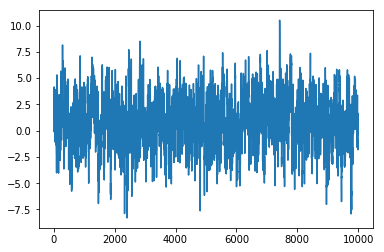

In [18]:
plt.plot(df["Value"])

In [51]:
df.info()#check for null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
Time     10000 non-null int64
Value    10000 non-null float64
dtypes: float64(1), int64(1)
memory usage: 156.3 KB


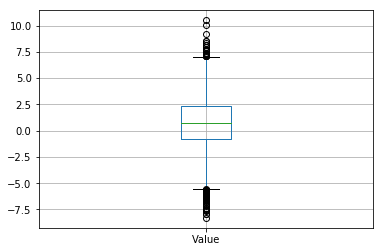

In [56]:
df.boxplot('Value')

In [68]:
filtered_df = df[df['Value'] > 7.0]
filtered_df.head(3)

,Time,Value
287,288,8.147741
866,867,7.114541
2463,2464,7.694929


In [67]:
(df['Value'] > 7.0).sum()

28

In [70]:
#calculating quartiles in the data
# Calculate quartiles
Q1 = np.percentile(df.Value, 25)
Q2 = np.percentile(df.Value, 50)
Q3 = np.percentile(df.Value, 75)

print("First Quartile (Q1):", Q1)
print("Second Quartile (Q2):", Q2)
print("Third Quartile (Q3):", Q3)

('First Quartile (Q1):', -0.83544281575)
('Second Quartile (Q2):', 0.7636043485)
('Third Quartile (Q3):', 2.3171326395)


In [77]:
#performind adfuller test for stationatity
X = df["Value"].values
result = adfuller(X)

In [89]:
result2 = adfuller(df["Value"], autolag='AIC')
result2

(-22.184930227433696,
 0.0,
 0L,
 9999L,
 {'1%': -3.4310041633725734,
  '10%': -2.566923883481157,
  '5%': -2.861829101294412},
 28167.38131837046)

# ADF test interpretation
The ADF test results will give you a test statistic and a p-value. The test statistic is compared to the critical values at different significance levels, usually 1%, 5%, and 10%. If the test statistic is more negative than the critical value, you can reject the null hypothesis and conclude that the time series is stationary. If the test statistic is less negative than the critical value, you cannot reject the null hypothesis and conclude that the time series has a unit root. The p-value is the probability of obtaining a test statistic as extreme or more extreme than the observed one under the null hypothesis. If the p-value is less than the significance level, you can reject the null hypothesis and conclude that the time series is stationary. If the p-value is greater than the significance level, you cannot reject the null

In [80]:
result #result is stored as tupple

(-22.184930227433696,
 0.0,
 0L,
 9999L,
 {'1%': -3.4310041633725734,
  '10%': -2.566923883481157,
  '5%': -2.861829101294412},
 28167.38131837046)

In [81]:
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))



ADF Statistic: -22.184930
p-value: 0.000000
Critical Values:
	5%: -2.862
	1%: -3.431
	10%: -2.567


In [90]:
if result[0] < result[4]["5%"]:
    print ("Reject Ho - Time Series is Stationary")
else:
    print ("Failed to Reject Ho - Time Series is Non-Stationary")

Reject Ho - Time Series is Stationary


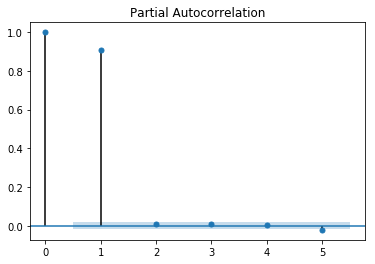

In [91]:
plot_pacf(X, lags=5);

In [94]:
df["Values_shifted"]  = df["Value"].shift() #using first lag sample

In [95]:
df.head(3)

,Time,Value,Values_shifted
0,1,0.000000,NaN
1,2,-0.090263,0.000000
2,3,0.749995,-0.090263


In [96]:
df.drop('Time', axis = 1, inplace=True) #dropping time column

In [98]:
df.dropna(inplace=True) #replacing NA with 0
df.head(3)

,Value,Values_shifted
1,-0.090263,0.000000
2,0.749995,-0.090263
3,1.247887,0.749995


In [100]:
#building a linear regression model
y = df.Value.values
X = df.Values_shifted.values

In [102]:
train_size = int(len(X) * 0.80)
train_size

7999

In [108]:
X_train, X_test = X[0:train_size], X[train_size:len(X)]
y_train, y_test = y[0:train_size], y[train_size:len(X)]

array([-0.09026324,  0.74999537,  1.24788668, ...,  1.68248296,
        1.63683752,  1.97991371])

In [109]:
X_train = X_train.reshape(-1,1) #converting to 2d array
X_test = X_test.reshape(-1,1)

In [110]:
X_train

array([[ 0.        ],
       [-0.09026324],
       [ 0.74999537],
       ...,
       [ 2.18128572],
       [ 1.68248296],
       [ 1.63683752]])

In [111]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [112]:
lr.coef_

array([0.90550879])

In [113]:
lr.intercept_

0.06868111625480777

In [114]:
y_pred = lr.predict(X_test)

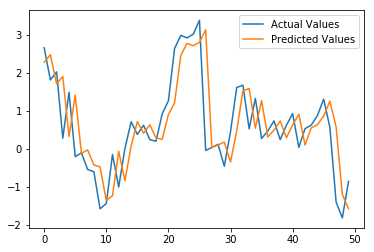

In [119]:
plt.plot(y_test[-50:], label="Actual Values")
plt.plot(y_pred[-50:], label="Predicted Values")
plt.legend()
plt.show()

In [120]:
model = ARIMA(y_train, order=(1,0,0))

In [121]:
model_fit = model.fit()

In [122]:
print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 7999
Model:                     ARMA(1, 0)   Log Likelihood              -11364.832
Method:                       css-mle   S.D. of innovations              1.002
Date:                Fri, 29 Mar 2024   AIC                          22735.663
Time:                        18:45:48   BIC                          22756.624
Sample:                             0   HQIC                         22742.838
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7250      0.118      6.130      0.000       0.493       0.957
ar.L1.y        0.9054      0.005    190.940      0.000       0.896       0.915
                                    Roots           